In [ ]:
"""
앙상블(ensemble) - '함께, 동시에, 한꺼번에, 협력하여' 등을 의미하는 부사
Bagging - 같은 알고리즘을 사용하되 훈련 세트의 서브셋을 무작위로 구성하여 다르게 학습하는 것. (약한 모델)
이 약한 모델들을 하나로 합치면 강한 모델이 된다.
단 이 약한 모델들의 성능이 어느정도는 나와주어야 좋은 모델이 만들어 진다.
Boosting - 배깅과 비슷하지만 정확도가 떨어지는 모델에는 가중치를 주어서 더 많은 데이터를 학습 시켜 모델 성능을 높이는 모델
부스팅의 종류에는 에이다부스트가 있다.
배깅은 일반 투표로 모델을 합친다.
부스팅은 가중치 투표로 모델을 합친다.
때문에 부스팅은 배깅보다 더 강력한 모델을 만들 수 있다.

배깅 기법에서 여러 개의 약한 모델을 결정트리로 하는 경우를 랜덤 포레스트라고 한다.
분류기에서 매우 인기있는 모델이다. 분류 외에도 회귀, 군집 분석에도 응용할 수 있다.
랜덤 포레스트 = 배깅(부스팅) + 결정트리
램덤 포레스트는 노이즈에 강한 면을 보이지만 학습데이터가 적으면 오버피틸 가능성이 커진다.
오버피팅 - 학습 데이터에 모델이 심하게 적합이 되서 테스트 데이터에 대한 정확도가 떨어지는 현상이다.
"""

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

#중산층 소비지출의 데이터를 가져온다. 
middle = pd.read_csv('middle.csv')
middle.head() 

,food,book,cul,cloth,travel,status
0,0.263017,0.759435,0.472159,0.365709,0.331119,1
1,0.192398,0.514150,0.222987,0.388257,0.307846,1
2,0.513997,0.448345,0.554666,0.394886,0.363455,0
3,0.387733,0.582956,0.425999,0.349615,0.197456,1
4,0.421674,0.560781,0.430536,0.734413,0.352037,0


In [23]:
X = middle.iloc[:, :5].values  
y = middle.iloc[:, 5].values  

In [24]:
X.shape , X

((100, 5),
 array([[0.2630173 , 0.75943461, 0.47215884, 0.36570879, 0.3311193 ],
        [0.19239765, 0.51414998, 0.22298671, 0.38825704, 0.30784603],
        [0.51399659, 0.44834533, 0.55466555, 0.39488594, 0.36345489],
        [0.38773349, 0.58295612, 0.42599865, 0.3496149 , 0.19745576],
        [0.42167405, 0.56078086, 0.43053578, 0.73441311, 0.35203734],
        [0.23469294, 0.54517782, 0.39570657, 0.48924468, 0.27591993],
        [0.22566019, 0.76835212, 0.41422909, 0.41538373, 0.19211627],
        [0.32739918, 0.80561335, 0.48688103, 0.43682852, 0.30881921],
        [0.31035202, 0.78164678, 0.43463183, 0.2876314 , 0.21364218],
        [0.34484129, 0.94676367, 0.45959479, 0.32362436, 0.22006993],
        [0.27302101, 0.75484889, 0.51226598, 0.28581768, 0.22835091],
        [0.19802664, 0.70836258, 0.47941553, 0.42311828, 0.17910679],
        [0.35324615, 0.44425109, 0.25497355, 0.38722925, 0.29777736],
        [0.20244306, 1.07627031, 0.32900676, 0.23429636, 0.29785087],
        [

In [4]:
y.shape , y 

((100,),
 array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64))

In [5]:
#데이터를 정규화한다. 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X)

X_regu = scaler.transform(X)
X_regu.shape , type(X)


((100, 5), numpy.ndarray)

In [6]:
X_regu

array([[-6.79490582e-01,  2.85452572e-01,  7.69363065e-01,
        -3.92848549e-01,  1.16109560e+00],
       [-1.36649081e+00, -7.93115937e-01, -1.70438786e+00,
        -1.77986086e-01,  7.31897271e-01],
       [ 1.76207947e+00, -1.08247293e+00,  1.58847972e+00,
        -1.14819268e-01,  1.75741834e+00],
       [ 5.33770153e-01, -4.90560785e-01,  3.11090235e-01,
        -5.46207407e-01, -1.30388542e+00],
       [ 8.63949841e-01, -5.88070095e-01,  3.56134286e-01,
         3.12053813e+00,  1.54685944e+00],
       [-9.55034863e-01, -6.56679973e-01,  1.03540717e-02,
         7.84325978e-01,  1.43126140e-01],
       [-1.04290710e+00,  3.24664723e-01,  1.94243500e-01,
         8.05043535e-02, -1.40235462e+00],
       [-5.31724583e-02,  4.88510281e-01,  9.15523136e-01,
         2.84851975e-01,  7.49844332e-01],
       [-2.19010248e-01,  3.83124161e-01,  3.96799407e-01,
        -1.13684875e+00, -1.00538045e+00],
       [ 1.16507338e-01,  1.10917815e+00,  6.44628679e-01,
        -7.93871530e-01

In [28]:
# 램덤포레스트 분류기
classifier = ensemble.RandomForestClassifier(n_estimators=10, max_depth=3, criterion="gini")
classifier.fit(X_regu , y)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [8]:
X_regu , type(X_regu) , y , type(y) , y.shape

(array([[-6.79490582e-01,  2.85452572e-01,  7.69363065e-01,
         -3.92848549e-01,  1.16109560e+00],
        [-1.36649081e+00, -7.93115937e-01, -1.70438786e+00,
         -1.77986086e-01,  7.31897271e-01],
        [ 1.76207947e+00, -1.08247293e+00,  1.58847972e+00,
         -1.14819268e-01,  1.75741834e+00],
        [ 5.33770153e-01, -4.90560785e-01,  3.11090235e-01,
         -5.46207407e-01, -1.30388542e+00],
        [ 8.63949841e-01, -5.88070095e-01,  3.56134286e-01,
          3.12053813e+00,  1.54685944e+00],
        [-9.55034863e-01, -6.56679973e-01,  1.03540717e-02,
          7.84325978e-01,  1.43126140e-01],
        [-1.04290710e+00,  3.24664723e-01,  1.94243500e-01,
          8.05043535e-02, -1.40235462e+00],
        [-5.31724583e-02,  4.88510281e-01,  9.15523136e-01,
          2.84851975e-01,  7.49844332e-01],
        [-2.19010248e-01,  3.83124161e-01,  3.96799407e-01,
         -1.13684875e+00, -1.00538045e+00],
        [ 1.16507338e-01,  1.10917815e+00,  6.44628679e-01,
    

In [29]:
expected = y
predicted = classifier.predict(X_regu)
predicted

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
print('Accuracy:\n',
      accuracy_score(expected, predicted))
print('Confusion matrix:\n',
      confusion_matrix(expected, predicted))


Accuracy:
 0.84
Confusion matrix:
 [[16 15]
 [ 1 68]]


In [11]:
# 에이다부스트 모델
classifier2 = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3), n_estimators=20)
classifier2.fit(X_regu , y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=20)

In [12]:
# 분류기 성능을 확인
expected2 = y
predicted2 = classifier.predict(X_regu)

print(predicted2) 

print('Accuracy:\n',
      accuracy_score(expected2, predicted2))
print('Confusion matrix:\n',
      confusion_matrix(expected2, predicted2))


[1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
Accuracy:
 0.84
Confusion matrix:
 [[15 16]
 [ 0 69]]


In [13]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [14]:
# 독립변수와 반응변수로 구분한다. 
diabetes_X = diabetes.data
diabetes_y = diabetes.target
disbetes_feature = diabetes.feature_names

In [15]:
diabetes_X , diabetes_X.shape , disbetes_feature

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 (442, 10),
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [16]:
diabetes_y , diabetes_y.shape

(array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
         42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
         83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
        104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
        173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
        107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
         60., 174., 259., 178., 128., 

In [17]:
#랜덤포레스트 회귀모델
model = ensemble.RandomForestRegressor()
model.fit(diabetes_X , diabetes_y)

RandomForestRegressor()

In [18]:
### 결정계수 표시
r2 = model.score(diabetes_X , diabetes_y)
print('결정계수', r2)

결정계수 0.9211035033521202


In [19]:
model.predict(diabetes_X)

array([178.48,  76.49, 150.92, 198.78, 122.13, 104.4 , 112.16,  89.05,
       123.5 , 230.48, 108.12, 113.07, 140.25, 184.47, 113.9 , 176.38,
       182.39, 164.01, 109.77, 141.64,  80.4 ,  77.2 ,  78.38, 243.73,
       163.51, 177.57, 122.28, 106.12, 128.38, 251.3 , 131.7 ,  64.73,
       295.62,  91.16,  73.57, 115.91, 249.07, 226.8 , 251.22, 121.51,
       133.34,  81.86,  80.12,  95.25, 226.67,  68.78, 169.39, 136.85,
        79.01, 159.07, 142.79, 204.84,  77.42, 121.39, 171.15, 106.01,
       107.54,  57.32, 157.14, 157.08,  71.81, 145.21,  53.85, 124.78,
        93.77, 166.52, 134.43, 100.63, 135.63, 144.2 ,  60.41, 268.48,
       186.24, 108.79, 111.69,  67.58, 170.96, 163.53, 227.46, 120.57,
       159.74,  87.19,  62.52, 186.45,  74.03, 130.12,  70.17, 148.19,
        54.73,  98.9 ,  89.09, 171.27,  81.69,  91.04,  95.93, 151.91,
       172.19, 240.51,  97.73, 107.77, 154.81,  99.79, 244.68, 183.95,
       107.37,  72.61, 124.32, 136.07, 227.45, 103.16, 107.22,  72.22,
      

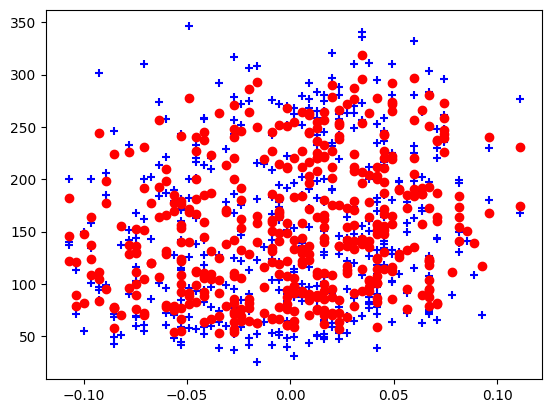

In [20]:
### 그래프 표시 - age
plt.scatter(diabetes_X[:,0] , diabetes_y , marker='+' , c = 'blue')
plt.scatter(diabetes_X[:,0] , model.predict(diabetes_X), marker='o' , c = 'red')
plt.show()


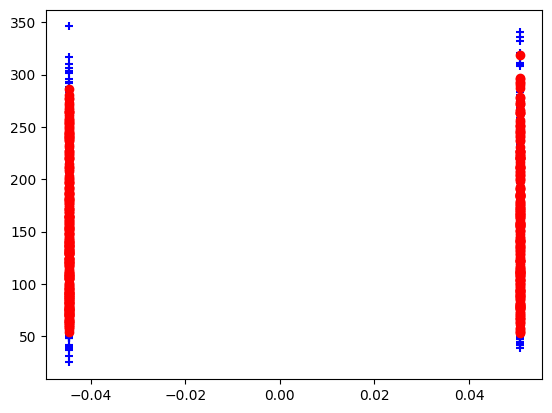

In [21]:
### 그래프 표시 - sex
plt.scatter(diabetes_X[:,1] , diabetes_y , marker='+' , c = 'blue')
plt.scatter(diabetes_X[:,1] , model.predict(diabetes_X), marker='o' , c = 'red')
plt.show()

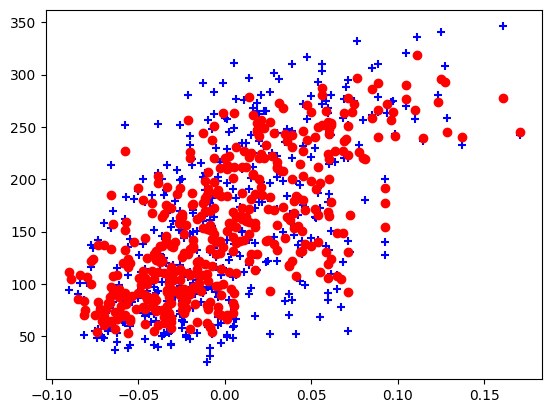

In [22]:
### 그래프 표시 - bmi
plt.scatter(diabetes_X[:,2] , diabetes_y , marker='+' , c = 'blue')
plt.scatter(diabetes_X[:,2] , model.predict(diabetes_X), marker='o' , c = 'red')
plt.show()